# On-policy first-visit Monte Carlo for $\epsilon$-greedy policies

In [1]:
from first_visit_MC import PlayerMC
from classes import Environment
import matplotlib.pyplot as plt

## Experiment with different $\epsilon$ values

In [2]:
parameters = [0.01, 0.05, 0.1, 0.2, 0.3] # epsilon values
environments = []

for eps in parameters:
    player = PlayerMC(epsilon = eps)
    env = Environment(player)
    environments.append(env)

In [3]:
for env in environments:
    env.train(50000, 500)

In [4]:
history = []

for env in environments:
    epochs, win_avg = env.history
    history.append((epochs, win_avg))

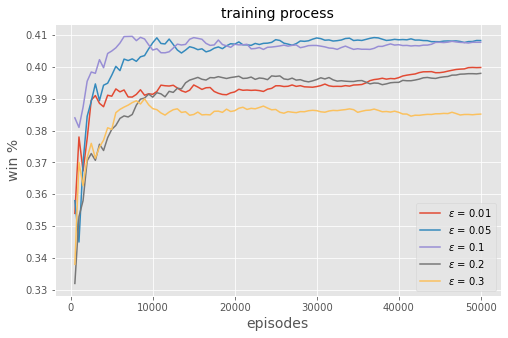

In [7]:
plt.figure(figsize=(8,5))
plt.style.use("ggplot")
for i in range(0, len(history)):
    lab = r'$\epsilon$ = {}'.format(parameters[i])
    plt.plot(history[i][0], history[i][1], label=lab)
plt.ylabel('win %', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('training process', fontsize=14)
plt.legend(loc="best")
plt.show();

## Check agent's current strategy

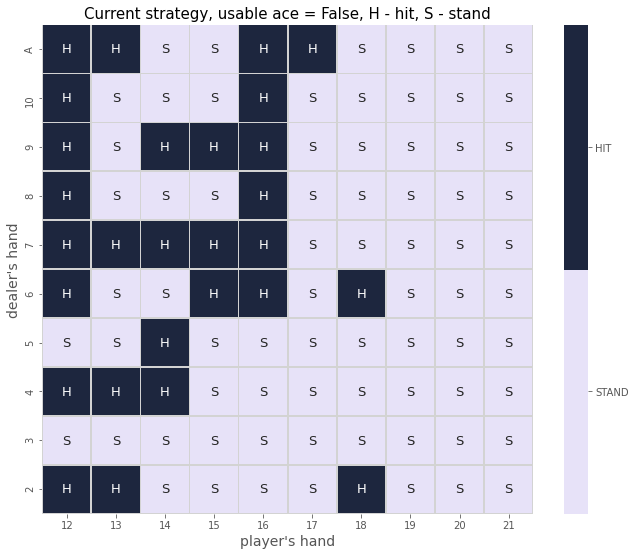

In [8]:
environments[0].plot_strategy()

## Check state values with respect to current policy

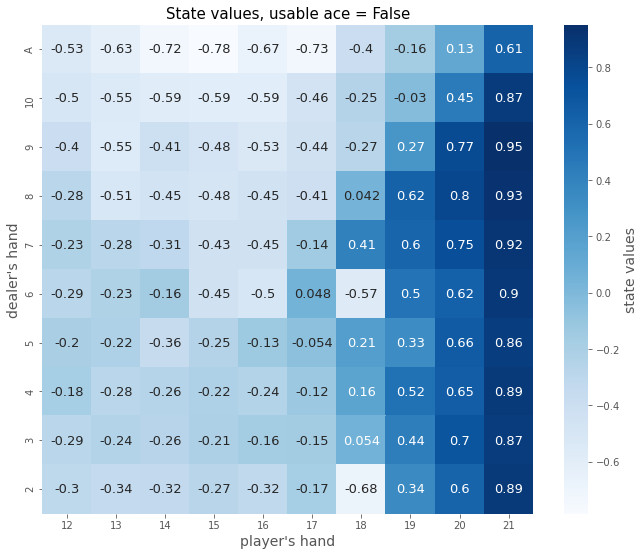

In [9]:
environments[0].plot_state_values()

## Decreasing $\epsilon$ value over time

High $\epsilon$ value at the beggining of the training enable trying all actions many times, so that the estimates can be more accurate. <br>
Later during training, $\epsilon$ decrease to very small values, this part is exploitation of previous knowledge.

In [10]:
player = PlayerMC(epsilon = 0.5)
env = Environment(player)

In [11]:
env.train(20000, 200)

In [12]:
env.player.epsilon = 0.1
env.train(10000, 200)

In [13]:
env.player.epsilon = 0.000005
env.train(20000, 200)

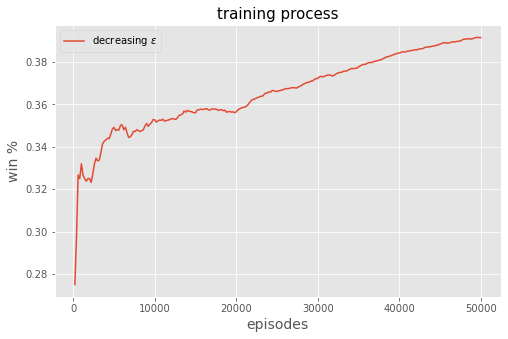

In [14]:
epochs, win_avg = env.history

plt.figure(figsize=(8,5))
plt.style.use("ggplot")
plt.plot(epochs, win_avg, label='decreasing ' + r'$\epsilon$')
plt.ylabel('win %', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('training process', fontsize=15)
plt.legend(loc="best")
plt.show();

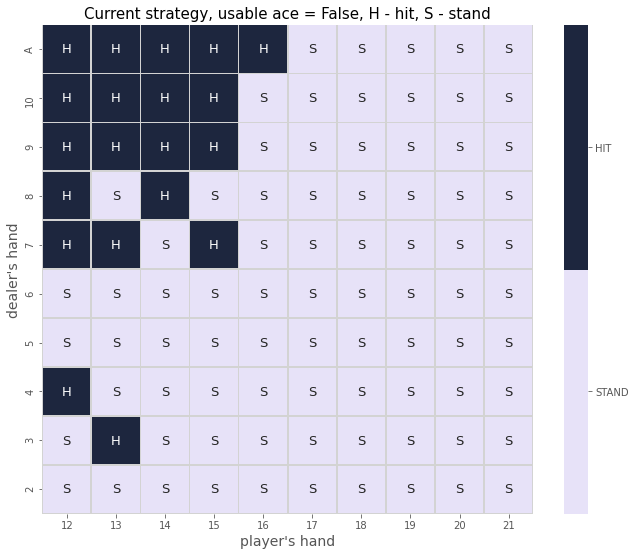

In [15]:
env.plot_strategy()

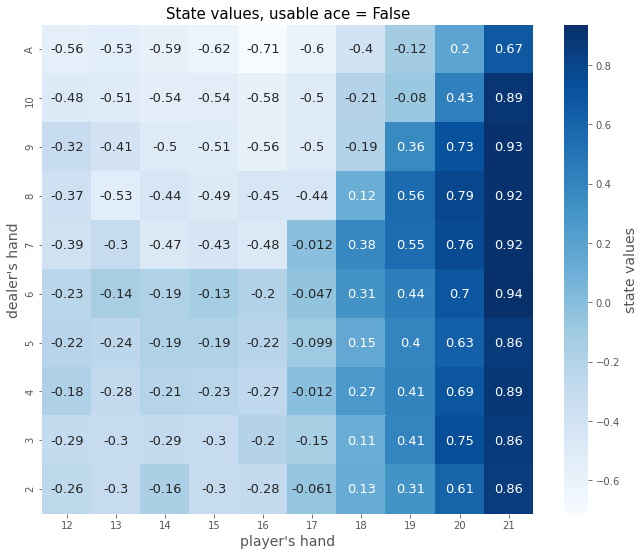

In [16]:
env.plot_state_values()

In [17]:
result = env.test(epochs = 20000)
print('decreasing eps, test result (win average): %s' % result)

decreasing eps, test result (win average): 0.43005


## Test performance for various $\epsilon$ values

In [18]:
for env in environments:
    result = env.test(epochs = 20000)
    print('eps = %s, test result (win average): %s' % (env.player.epsilon, result))

eps = 0.01, test result (win average): 0.41145
eps = 0.05, test result (win average): 0.42455
eps = 0.1, test result (win average): 0.42635
eps = 0.2, test result (win average): 0.42415
eps = 0.3, test result (win average): 0.4283
